In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv('real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df=df.drop("No",axis=1)
df=df.rename(columns={"X1 transaction date":"trans_date","X2 house age":"house_age","X3 distance to the nearest MRT station":
                     "MRT_station_dist","X4 number of convenience stores":"covenirnce_stores","X5 latitude":"latitude",
                     "X6 longitude":"longitude","Y house price of unit area":"price"})
# Changing colums name

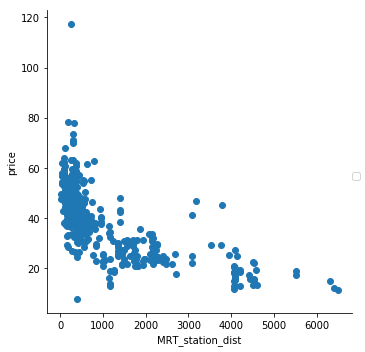

In [16]:
sns.FacetGrid(df,size=5).map(plt.scatter,'MRT_station_dist','price').add_legend()
# We can see that houses having less MRT Distance are priced more.

In [8]:
df_y=df['price'] #y label
df_x=df.drop('price',axis=1) # x label
df_x.head()

,trans_date,house_age,MRT_station_dist,covenirnce_stores,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
df_x.describe()

,trans_date,house_age,MRT_station_dist,covenirnce_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


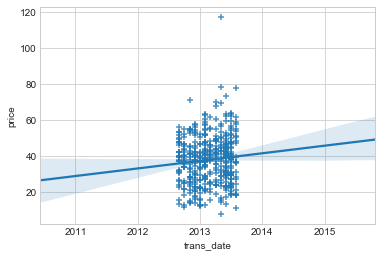

In [70]:
# Simple data-visualisations
sns.regplot(x='trans_date',y='price',data=df,marker="+")

#trans_date doest not help in differentiating prices for house

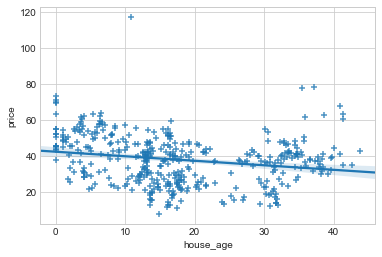

In [69]:
sns.regplot(x='house_age',y='price',data=df,marker="+")

# We can see that houses having less age are expensive slightly

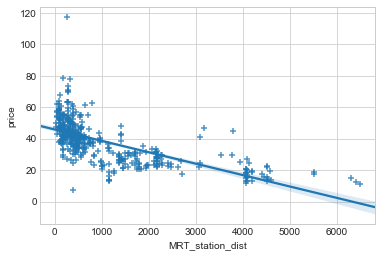

In [67]:
sns.regplot(x='MRT_station_dist',y='price',data=df,marker="+")
# We can see that houses having less MRT Distance are priced more.

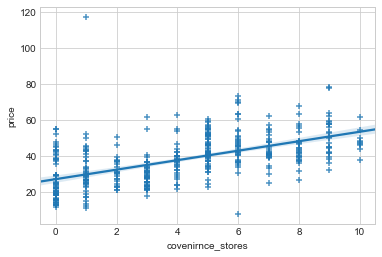

In [68]:
sns.regplot(x='covenirnce_stores',y='price',data=df,marker="+")
# We can see that houses having less convenience stores are priced little less

In [55]:
# We will first implement Linear Regression Directly.
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=5)
# 70:30 split for train and test

In [56]:
lm=LinearRegression(normalize=True)
# Our data will be used in normalised form for model training
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [59]:
y_test_array=y_test.as_matrix()
type(y_test_array)

C:\Users\punee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpy.ndarray

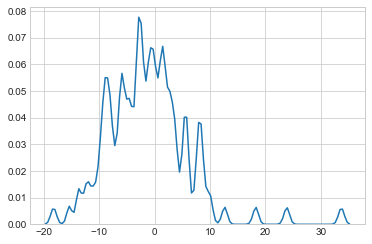

In [62]:
#PDF For Error.

delta_y=y_test_array-y_pred
sns.set_style('whitegrid')
sns.kdeplot(delta_y,bw=0.5)
plt.show()
# Max values b/w +-10


In [73]:
##################### Stochastic Gradient Descent #####################

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
# Standardizing data for SGD Regressor
from sklearn.pipeline import make_pipeline
est = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, shuffle=True))
# Alternate method : Pipelining
#scaler = StandardScaler()
#scaler.fit(x_train)  # fit only on training data
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)  # apply same transformation to test data

In [75]:
# Fitting the model
est.fit(x_train,y_train)
y_pred_sgd=est.predict(x_test)

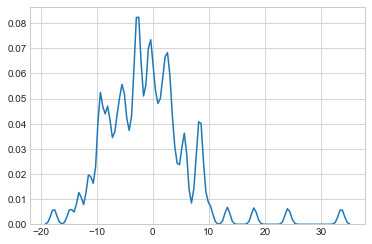

In [76]:
#PDF For Error.

delta_y_sgd=y_test_array-y_pred_sgd
sns.set_style('whitegrid')
sns.kdeplot(delta_y_sgd,bw=0.5)
plt.show()
# Max values b/w +-10
# Thus we get better results with SGD with peak clearly higher here.

In [90]:
# lets compare root mean square error for both
# RMS for normal linear regression
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test_array)

55.020654168188706

In [91]:
# RMS value for SGD
mean_squared_error(y_pred_sgd,y_test_array)

53.51035290489688